In [11]:
install.packages("FactoMineR")
library("FactoMineR")
install.packages("factoextra")
library("factoextra")
#Veridis
ionomics <- read.csv("FemaleMap1.csv",header = TRUE)
ionomics <- ionomics[,2:165]
#ionomics <- ionomics[,-10] #Iron <- Essential
#ionomics <- ionomics[,-13] #Copper <- Essential
#ionomics <- ionomics[,-1] #Lithium
#ionomics <- ionomics[,-4] #Aluminium
#ionomics <- ionomics[,-10] #Nickel
#ionomics <- ionomics[,-11] #Arsenic
#ionomics <- ionomics[,-11] #Rubidium
#ionomics <- ionomics[,-11] #Strontium
#names(ionomics)

Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'FactoMineR' is in use and will not be installed"
Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'factoextra' is in use and will not be installed"


This loads the packages and the file needed. 

In [12]:
ionsPCA <- PCA(ionomics, scale.unit = TRUE, ncp = 3, graph = TRUE ) #Scale.unit False means covariance
ionsPCA

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 19 individuals, described by 164 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error 

In [14]:
eig.val <- get_eigenvalue(ionsPCA)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,48.6917294,29.6900789,29.69008
Dim.2,28.9688054,17.6639058,47.35398
Dim.3,17.4560427,10.6439285,57.99791
Dim.4,13.7506014,8.3845130,66.38243
Dim.5,11.6476471,7.1022239,73.48465
Dim.6,7.3421941,4.4769476,77.96160
Dim.7,6.7073534,4.0898496,82.05145
Dim.8,6.3590228,3.8774530,85.92890
Dim.9,4.8016842,2.9278562,88.85676
Dim.10,4.6421498,2.8305792,91.68734


This shows the different dimensions, or eigenvalues associated with this PCA. The values are ranked from largest to smallest, as a larger value indicates more % variance explained. This also shows us the % variance explained by each dimension (multiply the eigenvalue by 10), as well as the cumulative % variance explained. With only 2 dimensions, we can explain 49% of the variance of 20 dimensions. 

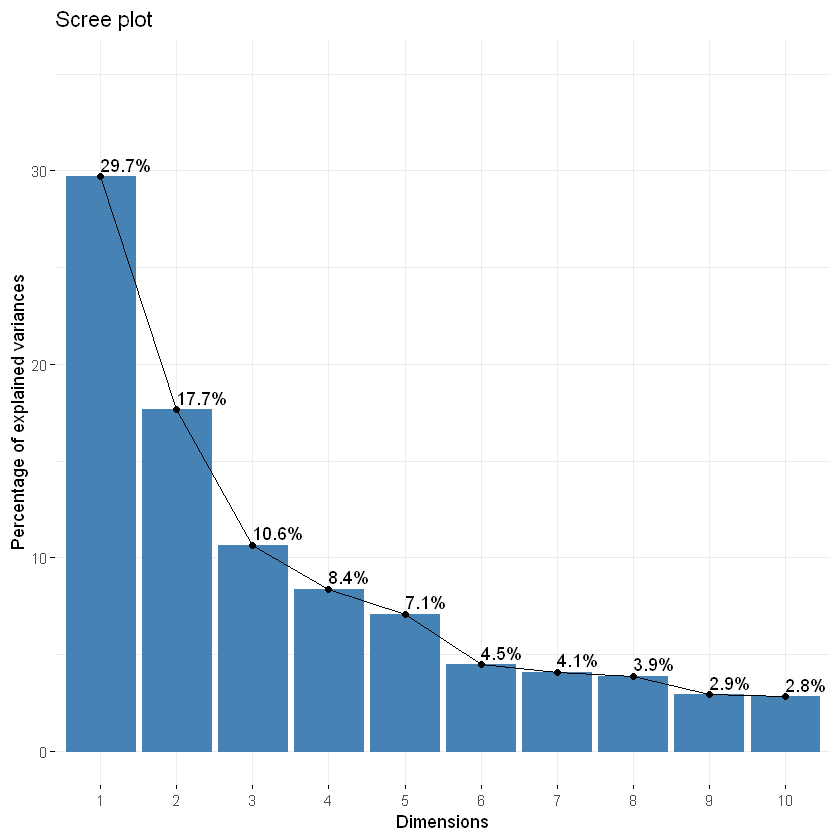

In [15]:
fviz_eig(ionsPCA, addlabels = TRUE, ylim = c(0, 35))

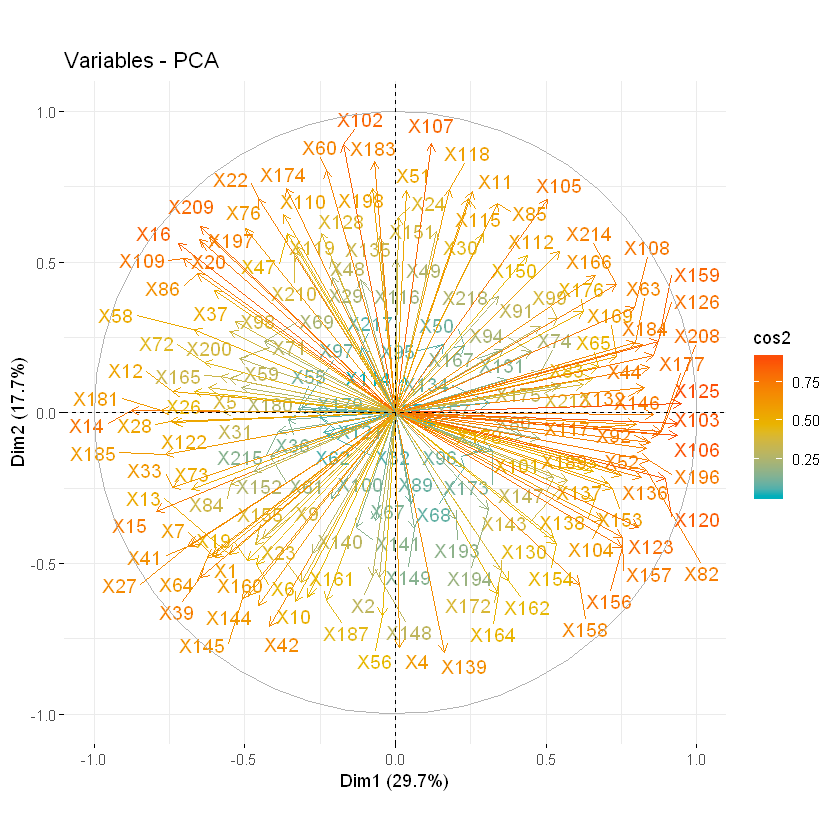

In [16]:
fviz_pca_var(ionsPCA, col.var = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)

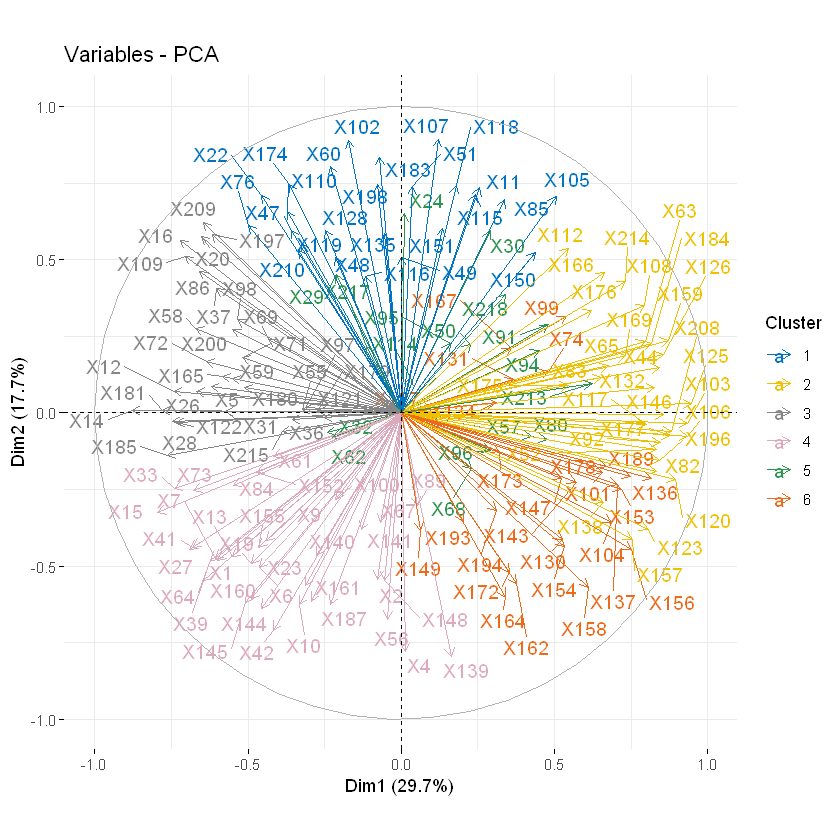

In [17]:
set.seed(123)
ions.km <- kmeans(ionsPCA$var$coord, centers = 6, nstart = 25)
grp <- as.factor(ions.km$cluster)
fviz_pca_var(ionsPCA, col.var = grp, 
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF", "#ddaabb","#2e9551","#ec6b1a"),
             legend.title = "Cluster",
            repel = TRUE)
#dendogram, to explain clustering

* Positively correlated variables are grouped together
* Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
* The distance between variables and the origin measures the quality of the variables on the factor map. Variables that are away from the origin are well represented on the factor map.

From [here](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/)

From this we can see that As, Mn, Ni, Fe, Li, Al, and Co are positively associated (Group 1), and all reasonably well represented. Furthermore, Cu and P (Group 2) are associated and negatively associated with Group 1, while Zn and Mg (Group 3) are associated but are not opposed to any other group. Group 3 also has a lower representation, and lastly S and Mo are associated (Group 4). These groupings should be investigated with QTL analysis. 

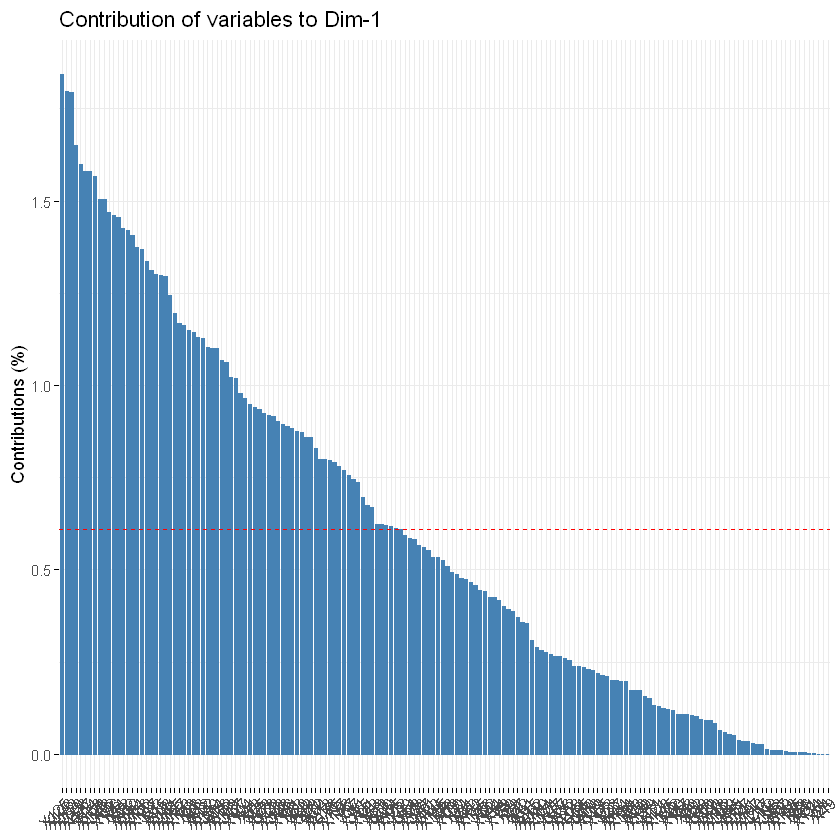

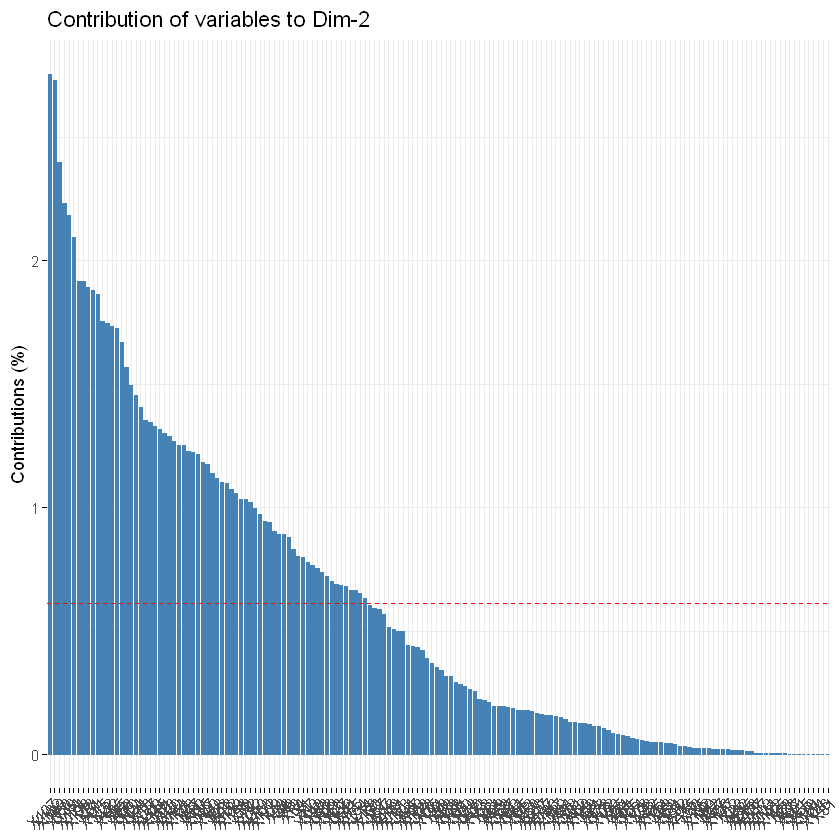

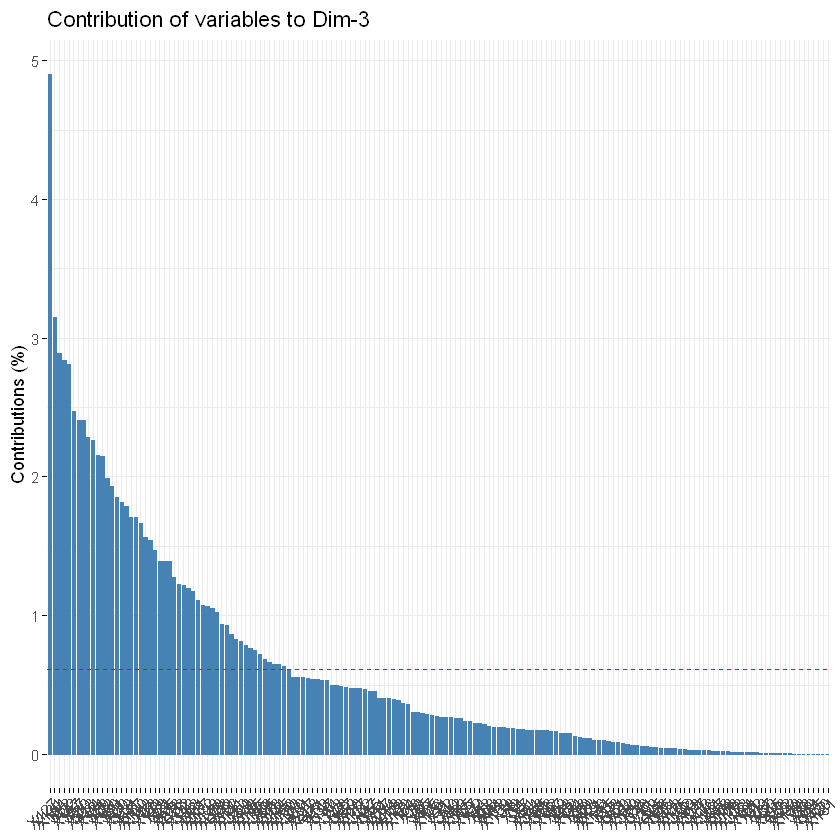

In [18]:
fviz_contrib(ionsPCA, choice = "var", axes = 1)
fviz_contrib(ionsPCA, choice = "var", axes = 2)
fviz_contrib(ionsPCA, choice = "var", axes = 3)
#fviz_contrib(ionsPCA, choice = "var", axes = 1:2)

In [19]:
res.desc <- dimdesc(ionsPCA, axes = c(1,2,3), proba = 0.05)
res.desc$Dim.1
res.desc$Dim.2
res.desc$Dim.3
#Sr occurs in both, dues to the orthogonal nature of the Dims.
#Combined may not be as informative as indep. axes

$quanti
     correlation      p.value
X125   0.9474432 7.709074e-10
X106   0.9356402 4.142475e-09
X103   0.9344107 4.844736e-09
X120   0.8963427 2.076392e-07
X208   0.8820730 5.910632e-07
X177   0.8771226 8.238433e-07
X159   0.8735322 1.039078e-06
X126   0.8560218 2.939813e-06
X146   0.8554363 3.036649e-06
X92    0.8455113 5.153508e-06
X196   0.8433606 5.751630e-06
X44    0.8420441 6.146625e-06
X52    0.8333138 9.410205e-06
X82    0.8316175 1.019343e-05
X132   0.8275993 1.227674e-05
X184   0.8180373 1.876398e-05
X136   0.8164406 2.009372e-05
X123   0.8061850 3.072942e-05
X117   0.7991478 4.055603e-05
X63    0.7959079 4.591766e-05
X108   0.7942016 4.897782e-05
X157   0.7540857 1.918654e-04
X156   0.7521094 2.038651e-04
X189   0.7481979 2.295038e-04
X169   0.7323377 3.634339e-04
X214   0.7320303 3.665729e-04
X153   0.7188811 5.241096e-04
X137   0.7040262 7.673295e-04
X104   0.6850096 1.211200e-03
X65    0.6747398 1.529153e-03
X178   0.6684606 1.755820e-03
X166   0.6633516 1.960290e-03
X1

$quanti
     correlation      p.value
X107   0.8933862 2.609885e-07
X102   0.8896126 3.461516e-07
X183   0.8336575 9.257973e-06
X60    0.8041516 3.333201e-05
X174   0.7451332 2.514589e-04
X198   0.7445898 2.555318e-04
X118   0.7405294 2.877787e-04
X51    0.7381029 3.086480e-04
X11    0.7346838 3.402219e-04
X115   0.7128440 6.136348e-04
X22    0.7107981 6.467560e-04
X105   0.7072517 7.077350e-04
X85    0.6953315 9.493586e-04
X110   0.6577820 2.205377e-03
X24    0.6493987 2.621882e-03
X209   0.6198933 4.639212e-03
X76    0.6109681 5.454128e-03
X151   0.6017780 6.412043e-03
X128   0.5962428 7.052330e-03
X47    0.5957110 7.116493e-03
X30    0.5936666 7.367598e-03
X135   0.5855414 8.437800e-03
X197   0.5828920 8.812830e-03
X20    0.5742754 1.012692e-02
X16    0.5635630 1.197662e-02
X119   0.5533470 1.398471e-02
X112   0.5368555 1.778707e-02
X210   0.5307974 1.937417e-02
X150   0.5227026 2.166780e-02
X109   0.5110464 2.534144e-02
X49    0.5080268 2.636859e-02
X48    0.5076798 2.648867e-02
X8

$quanti
     correlation      p.value
X62    0.7043492 7.611790e-04
X32    0.7000587 8.463668e-04
X57    0.6480286 2.695771e-03
X80    0.6480249 2.695973e-03
X213   0.6312402 3.750169e-03
X94    0.6286026 3.943125e-03
X50    0.6123513 5.320681e-03
X29    0.5889517 7.974225e-03
X91    0.5687953 1.104194e-02
X30    0.5630975 1.206277e-02
X31    0.5459468 1.560099e-02
X68    0.4927325 3.208210e-02
X24    0.4926631 3.211006e-02
X65    0.4922794 3.226494e-02
X218   0.4723374 4.114745e-02
X12    0.4605121 4.723775e-02
X143  -0.4571218 4.910461e-02
X153  -0.4620626 4.640222e-02
X149  -0.5072042 2.665398e-02
X76   -0.5190577 2.276814e-02
X198  -0.5228100 2.163602e-02
X100  -0.5391552 1.721240e-02
X167  -0.5457023 1.565684e-02
X179  -0.5587553 1.289058e-02
X180  -0.5804165 9.175323e-03
X134  -0.6137700 5.186593e-03
X147  -0.6565398 2.263372e-03
X194  -0.7102182 6.564133e-04
X131  -0.7418390 2.770209e-04
X127  -0.9251164 1.447201e-08

attr(,"class")
[1] "condes" "list " 

Correlations are correlated with the loadings, or eigenvectors

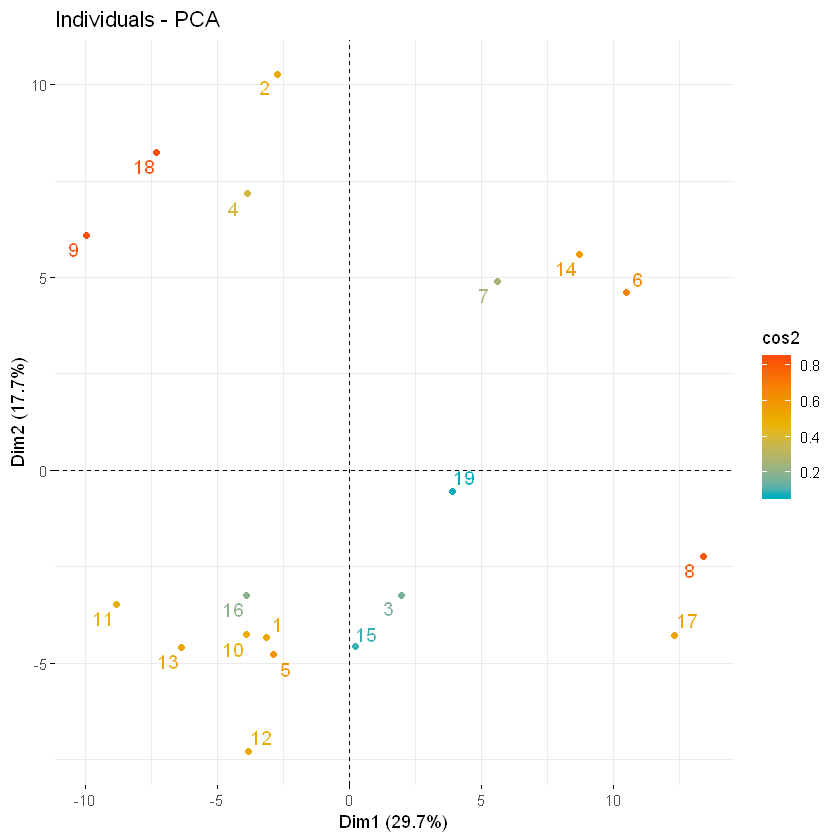

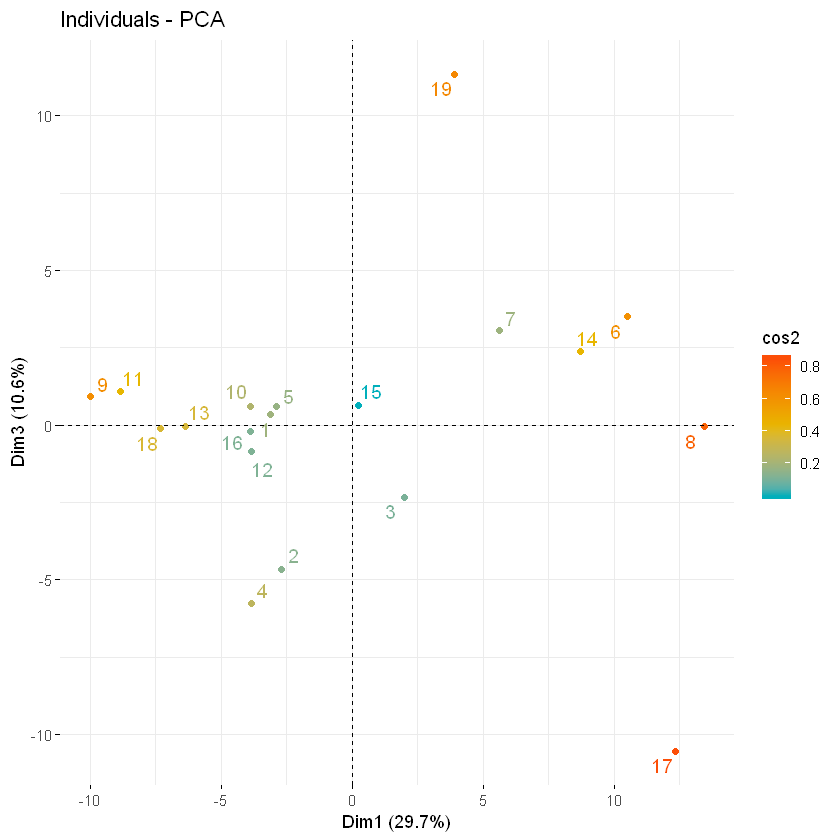

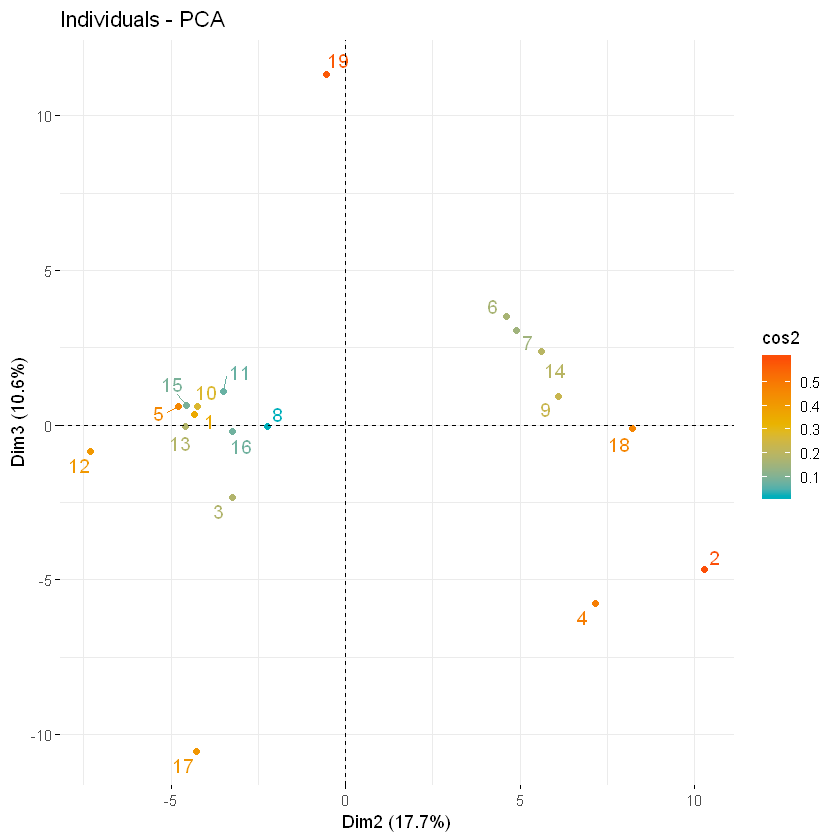

In [20]:
fviz_pca_ind(ionsPCA,
             col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             axes = c(1,2),
             repel = TRUE)
fviz_pca_ind(ionsPCA,
             col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             axes = c(1,3),
             repel = TRUE)
fviz_pca_ind(ionsPCA,
             col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             axes = c(2,3),
             repel = TRUE)

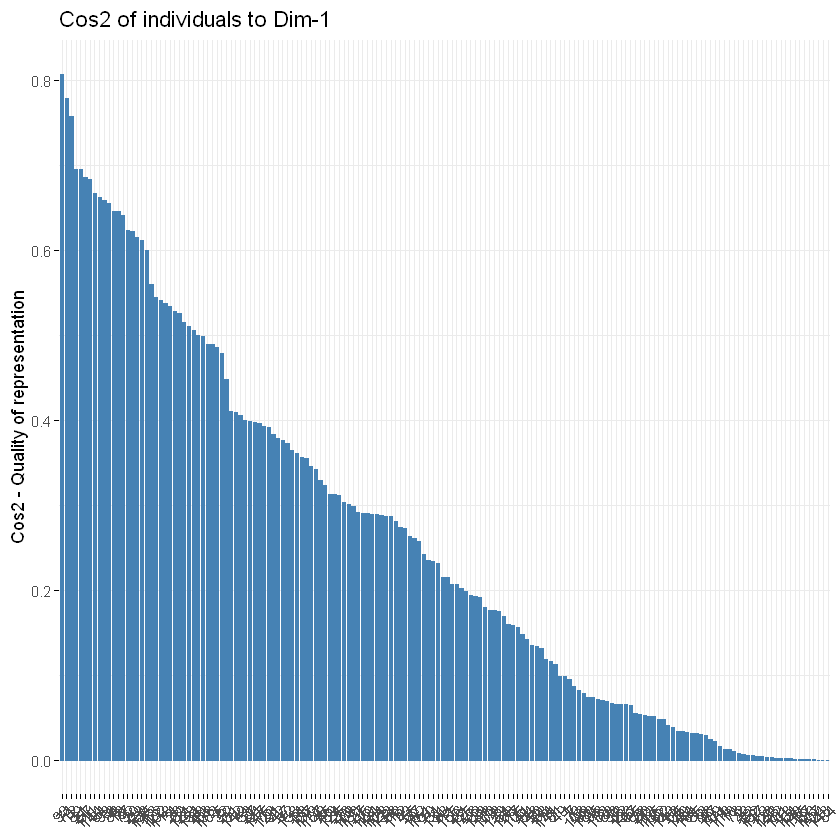

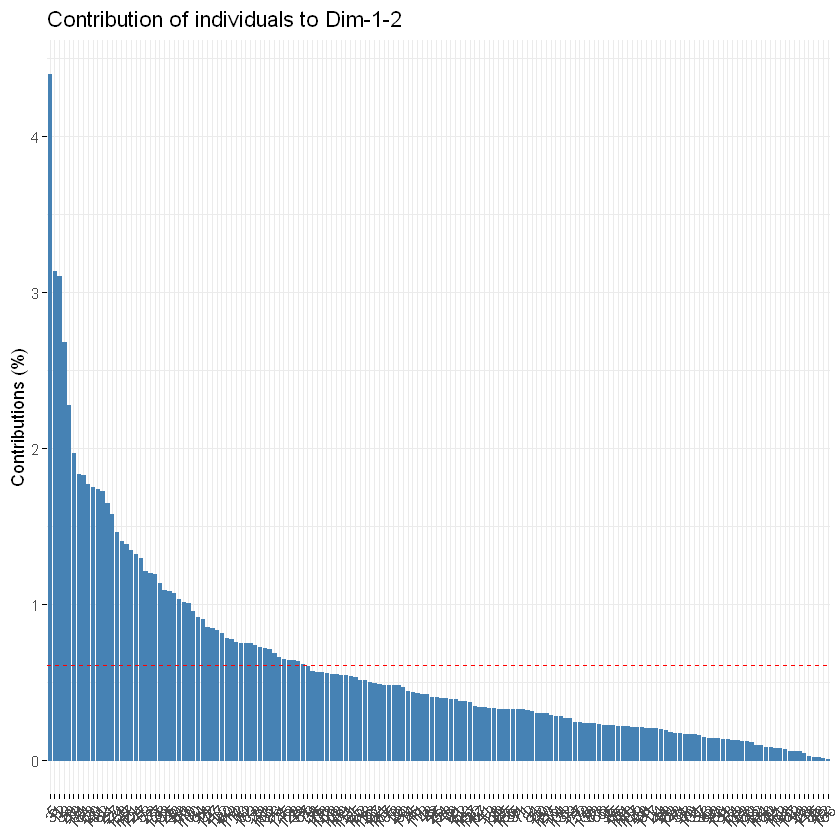

In [254]:
fviz_cos2(ionsPCA, choice = "ind")
fviz_contrib(ionsPCA, choice = "ind", axes = 1:2)

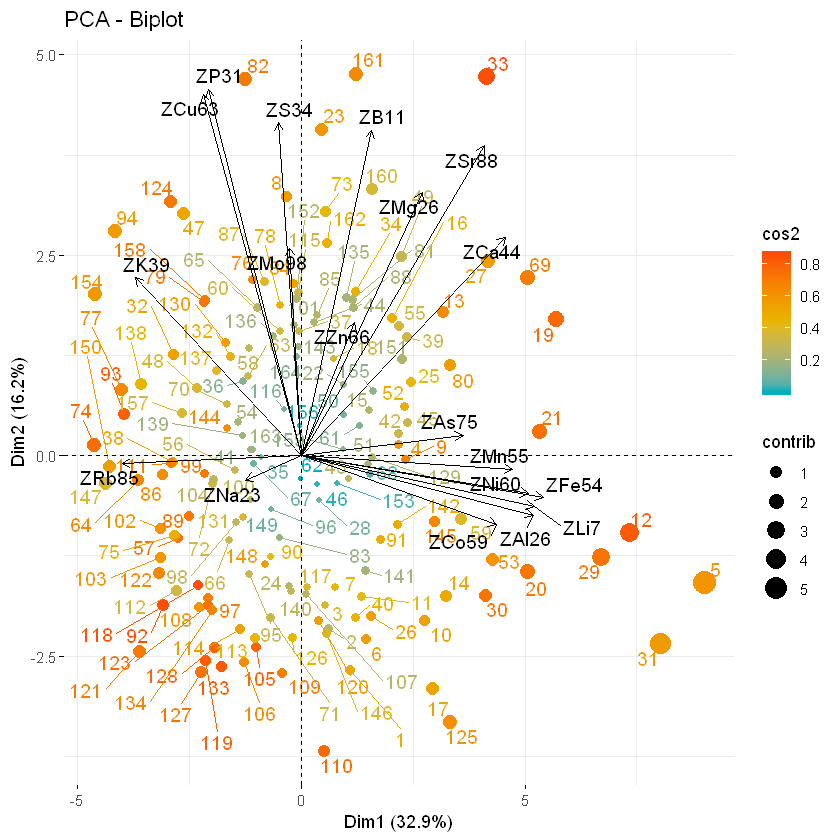

In [193]:
fviz_pca_biplot(ionsPCA,repel = "True",
                col.ind = "cos2",
                gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
                pointsize = "contrib",
                col.var = "black"
               )

I Beilve PCA() uses the correlation method, but would it be informative to use the covariance method?

In [255]:
cor(ionomics)

,ZLi7,ZB11,ZNa23,ZMg26,ZAl26,ZP31,ZS34,ZK39,ZCa44,ZMn55,ZCo59,ZNi60,ZCu63,ZZn66,ZAs75,ZRb85,ZSr88,ZMo98
ZLi7,1.00000000,-0.030589007,-0.140581867,0.18132706,0.94058440,-0.13458822,-0.096561293,-0.26391740,0.35773530,0.53551117,0.66422724,0.66832045,-0.203466941,0.138443575,0.521165779,-0.35877425,0.32285413,0.074129471
ZB11,-0.03058901,1.000000000,-0.081382967,0.55879916,-0.09796372,0.13843807,0.209401600,-0.20889729,0.63741571,0.11773065,-0.08613444,0.08562448,0.217021542,0.064670194,0.094782325,-0.15764882,0.67279424,0.007281405
ZNa23,-0.14058187,-0.081382967,1.000000000,0.05297335,-0.13568598,0.03007726,-0.096746229,0.04558016,-0.13598306,-0.19941974,-0.11175473,-0.18028747,-0.005347981,-0.008557291,-0.104160660,0.10085681,-0.09881878,0.012925795
ZMg26,0.18132706,0.558799164,0.052973347,1.00000000,0.17151686,0.08549347,0.108309189,-0.21980101,0.62943748,0.18390038,0.11726318,0.24398495,0.030628013,0.088559861,0.158986410,-0.18001642,0.76360432,-0.066306706
ZAl26,0.94058440,-0.097963724,-0.135685979,0.17151686,1.00000000,-0.14544723,-0.046341522,-0.21423971,0.30480329,0.54858581,0.66912009,0.72619529,-0.200670226,0.091688110,0.532271851,-0.35520584,0.30597646,0.092664653
ZP31,-0.13458822,0.138438074,0.030077262,0.08549347,-0.14544723,1.00000000,0.476760999,0.66066036,-0.12886004,-0.24615760,-0.13584814,-0.28333242,0.720073621,0.219631904,-0.043548164,0.27001896,0.07394409,0.445391274
ZS34,-0.09656129,0.209401600,-0.096746229,0.10830919,-0.04634152,0.47676100,1.000000000,0.41966554,0.07428199,0.05097488,-0.05467181,-0.01704555,0.516383092,0.091943344,0.001038088,0.02079577,0.21132418,0.258383781
ZK39,-0.26391740,-0.208897287,0.045580162,-0.21980101,-0.21423971,0.66066036,0.419665536,1.00000000,-0.57179923,-0.36955779,-0.19399524,-0.33480512,0.614236757,0.072546791,-0.224307737,0.56631806,-0.34119537,0.262453977
ZCa44,0.35773530,0.637415710,-0.135983057,0.62943748,0.30480329,-0.12886004,0.074281990,-0.57179923,1.00000000,0.51801827,0.21504998,0.40636962,-0.081706470,0.167167259,0.317462554,-0.58728099,0.91561964,0.033856448
ZMn55,0.53551117,0.117730652,-0.199419736,0.18390038,0.54858581,-0.24615760,0.050974877,-0.36955779,0.51801827,1.00000000,0.56928967,0.60874490,-0.236055612,0.098967999,0.361409176,-0.43618159,0.41995755,-0.082615405
